In [1]:
import numpy as np
import pandas as pd
import sklearn.cluster
import yellowbrick.cluster
import unittest
import os
import sys
import warnings
warnings.filterwarnings("ignore")

task_path = os.path.abspath(os.path.join(os.getcwd(),"..","src"))
sys.path.append(task_path)
from task3 import *
utils_path = os.path.abspath(os.path.join(os.getcwd(),"..","tests"))
sys.path.append(utils_path)
from utils import *

C:\Users\ybsha\AppData\Local\Temp\ipykernel_23848\1614571795.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load all input and output datasets. These will be used in the validation step
kmeans_train_dataset = pd.read_csv(os.path.join(os.getcwd(),"..","task3", "wine_train_features.csv"))
#print('means_train_dataset : \n',kmeans_train_dataset)
kmeans_test_dataset = pd.read_csv(os.path.join(os.getcwd(),"..","task3", "wine_test_features.csv"))
#print('kmeans_test_dataset : \n',kmeans_test_dataset)
kmeans_train_cluster_ids = pd.read_pickle(os.path.join(os.getcwd(),"..","task3","pkl_files", "kmc_train_ids.pkl"))
#print('kmeans_train_cluster_ids : \n',kmeans_train_cluster_ids)
kmeans_test_cluster_ids = pd.read_pickle(os.path.join(os.getcwd(),"..","task3","pkl_files", "kmc_test_ids.pkl"))
#print('kmeans_test_cluster_ids : \n',kmeans_test_cluster_ids)
kmeans_test_feat_ans = pd.read_pickle(os.path.join(os.getcwd(),"..","task3","pkl_files", "train_add_kmeans_cluster_id_feature.pkl"))
#print('kmeans_test_feat_ans : \n',kmeans_test_feat_ans)
kmeans_train_feat_ans = pd.read_pickle(os.path.join(os.getcwd(),"..","task3","pkl_files", "test_add_kmeans_cluster_id_feature.pkl"))
#print('kmeans_train_feat_ans : \n',kmeans_train_feat_ans)

## KmeansClustering:`kmeans_train`

Kmeans Clustering is a process of grouping together similar rows together and assigning them to a cluster. For this method you will use the training data to fit an optimal K-means cluster on the data.

To help you get started we have provided a list of subtasks to complete for this task:
1. Initialize an sklearn K-means model using random_state from the `__init__` method and setting n_init = 10.
2. Initialize a yellowbrick KElbowVisualizer with the K-means model to search for the optimal value of k (between 1 and 10).
3. Train the KElbowVisualizer on the training data and determine the optimal k value. 
4. Now, train a K-means model with the proper initialization for that optimal value of k 
5. Return the cluster ids for each row of the training set as a list.

##### Useful Resources
* <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans>
* <https://www.scikit-yb.org/en/latest/api/cluster/elbow.html>

##### INPUTS
train features and random state

##### OUTPUTS 
a list of cluster ids that the K-means model has assigned for each row in the train dataset

In [5]:
# Write your code here
def kmeans_train(train_features,test_features,random_state) -> list:
    
    initial_kmeans = sklearn.cluster.KMeans(random_state=random_state, n_init=10)

    # Step 2: Initialize KElbowVisualizer
    elbow = yellowbrick.cluster.KElbowVisualizer(initial_kmeans, k=(1, 10))

    # Step 3: Fit the KElbowVisualizer and determine optimal k
    elbow.fit(train_features)
    optimal_k = elbow.elbow_value_

    # Step 4: Train K-means model with optimal k
    kmeans_model = sklearn.cluster.KMeans(n_clusters=optimal_k, 
                                random_state=random_state, 
                                n_init=10)
    kmeans_model.fit(train_features)

    # Step 5: Return cluster ids
    cluster_ids = kmeans_model.labels_.tolist()
    return cluster_ids


RUNNING TEST FOR Kmeans Train Cluster IDs

Passed...


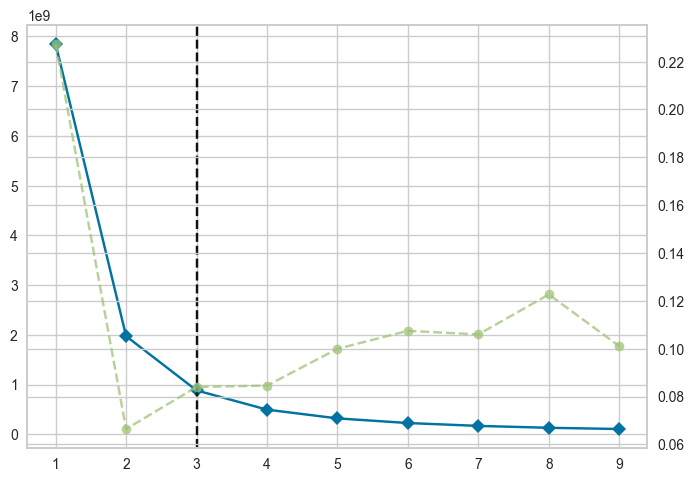

In [6]:
# Run this cell to test your code
random_state = 42
train_ids = kmeans_train(kmeans_train_dataset,kmeans_test_dataset,random_state)
if compare_submission_to_answer(train_ids,kmeans_train_cluster_ids,"Kmeans Train Cluster IDs"):
    print('Passed...')
else:
    print('Failed...')    

## KmeansClustering:`kmeans_test`

K-means Clustering is a process of grouping together similar rows together and assigning them to a cluster. For this method you will use the training data to fit an optimal K-means cluster on the test data.


To help you get started, we have provided a list of subtasks to complete for this task:
1. Use the model you trained in the kmeans_train method to generate cluster ids for each row of the test dataset
2. Return the cluster ids for each row of the test set as a list.

##### Useful Resources
* <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans>
* <https://www.scikit-yb.org/en/latest/api/cluster/elbow.html>

##### INPUTS
train features, test features and random state

##### OUTPUTS 
a list of cluster ids that the kmeans model has assigned for each row in the test dataset

In [ ]:
def kmeans_test(train_features,test_features,random_state) -> list:
    # TODO: Read the function description in https://github.gatech.edu/pages/cs6035-tools/cs6035-tools.github.io/Projects/Machine_Learning/Task3.html and implement the function as described
    cluster_ids = list()

    #Train the model

    #Process test dataset

    return cluster_ids

In [ ]:
random_state = 42
test_ids = kmeans_test(kmeans_train_dataset,kmeans_test_dataset,random_state)
if compare_submission_to_answer(test_ids,kmeans_test_cluster_ids,"Kmeans Test Cluster IDs"):
    print('Passed...')
else:
    print('Failed...')    

## KmeansClustering:`train_add_kmeans_cluster_id_feature`, `test_add_kmeans_cluster_id_feature`

Using the two methods you completed above (`kmeans_train` and `kmeans_test`) you will add a new feature/column to the training and test dataframes. This is similar to the feature engineering method in Task 2. To do this, use the output of the methods (the list of cluster ids) from the corresponding method and add it as a new column (named `kmeans_cluster_id`) in the input dataframe, then return the full dataframe.

##### Useful Resources

##### INPUTS
train features, test features and random state

##### OUTPUTS 

a Pandas dataframe with the `kmeans_cluster_id` added as a feature and all other input columns unchanged

In [ ]:
def train_add_kmeans_cluster_id_feature(train_features,test_features,random_state) -> pd.DataFrame:
    # TODO: Read the function description in https://github.gatech.edu/pages/cs6035-tools/cs6035-tools.github.io/Projects/Machine_Learning/Task3.html and implement the function as described
    output_df = pd.DataFrame()

    #Train the model

    #Process cluster ids
        
    return output_df

In [ ]:
random_state = 42
train_features_and_id = train_add_kmeans_cluster_id_feature(kmeans_train_dataset,kmeans_test_dataset,random_state)
if compare_submission_to_answer_df(train_features_and_id,kmeans_train_feat_ans,"Kmeans Train DF"):
    print('Passed...')
else:
    print('Failed...')

In [ ]:
def test_add_kmeans_cluster_id_feature(train_features,test_features,random_state) -> pd.DataFrame:
    # TODO: Read the function description in https://github.gatech.edu/pages/cs6035-tools/cs6035-tools.github.io/Projects/Machine_Learning/Task3.html and implement the function as described
    output_df = pd.DataFrame()

    #Train the model

    #Process test dataset
    
    #Process cluster ids

    return output_df

In [ ]:
random_state = 42
test_features_and_id = test_add_kmeans_cluster_id_feature(kmeans_train_dataset,kmeans_test_dataset,random_state)

if compare_submission_to_answer_df(test_features_and_id,kmeans_test_feat_ans,"Kmeans Test DF"):
    print('Passed...')
else:
    print('Failed...')    

# You have successfully reached the end of this notebook.